In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import bq_helper
import os

In [3]:
from google.cloud import bigquery

In [4]:
# prepare dateset, project name and set up a query
# using Kaggle's public dataset BigQuery integration
# step 1: set up project and dataset
# step 2: define query as selecting criteria
# step 3: query data from dataset and convert it into pandas
usa_names=bq_helper.BigQueryHelper(active_project='bigquery-public-data',dataset_name='usa_names')
query = """SELECT year, gender, name, sum(number) as count FROM `bigquery-public-data.usa_names.usa_1910_current` GROUP BY year, gender, name"""
data=usa_names.query_to_pandas_safe(query)
data.to_csv('usa_names_data.csv')

Using Kaggle's public dataset BigQuery integration.


In [5]:
# now view a sample of data
data.sample(15)

,year,gender,name,count
330398,2018,F,Caoimhe,5
299493,1985,F,Nai,7
43161,1968,F,Georgina,185
419189,2007,M,Remington,234
458065,1936,M,Loyd,313
56599,1980,F,Elena,597
497235,1940,M,Spurgeon,6
239824,1990,F,Rosio,51
17846,1941,F,Rosalie,1499
331449,1919,F,Albert,5


In [6]:
# 计算 行和列数
# Python中的另起一行是\n, markdown的另起一行是<br/>
print('Number of rows and columns in the data:',data.shape,'\n')
# 计算 列表的时间跨度和总时间数
print('Number and Range of years available:', len(data['year'].unique()),'years between',data['year'].min(),'to',data['year'].max())
# 计算 报名的总人数（计算重复名的情况）
print('Total number of applicants in the dataset:',sum(data['count']))

Number of rows and columns in the data: (623575, 4) 

Number and Range of years available: 109 years between 1910 to 2018
Total number of applicants in the dataset: 311155210


知识点1：format（）的用法
1. format可以用来形容/修改/替代任何字符串string
2. syntax：template.format()，template为包含要修改/形容的字符串的string，用{}标注作为placeholder；可有多个需要改变的字符串
3. template的更精确的修改要求书写，看这个syntax：{[argument_index_or_keyword]:[width][.precision][type]}, type可用code代替：d 整数；f 小数；b 二进制数；s 字符串；..
4. 举个例子：“floating point {0:.2f}”.format(345.7916732) 的输出结果是：floating point 345.79。f表示小数，.2表示小数点后2位，0表示index
5. 再举个例子：‘floating point pi ={0:.3f}, with {1:d} digit precision’.format(math.pi,3) 每一个要修饰的地方，都要有{}作为placeholder，然后是index：...的格式，看修饰的部分的特点。

In [7]:
#计算 男女用户所占总数的百分比
print('% of male applicants: {0:.2f}'.format(sum(data['count'][data["gender"]=="M"]/sum(data['count']))))
print('% of male applicants: {0:.2f}'.format(sum(data['count'][data["gender"]=="F"]/sum(data['count']))))

% of male applicants: 0.52
% of male applicants: 0.48


In [8]:
# 计算 用户名称的总数（不计算重复名的情况）
print('Total number of unique names in the data set:', len(data['name'].unique()))

Total number of unique names in the data set: 31595


In [9]:
# 计算 男女用户的个数
print("Total number of unique male names in the data set:", len(data['name'][data['gender']=='M'].unique()))
print("Total number of unique male names in the data set:", len(data['name'][data['gender']=='F'].unique()))

Total number of unique male names in the data set: 13785
Total number of unique male names in the data set: 20852


知识点 2：tabulate的用法 （绘制纯文本表格）
1. 只有一个function，即tabulate()，括号里面是list或者lists整齐的数据，即可输出一个干净整洁的纯文本表格
2. 在python里安装： pip install tabulate from tabulate import tabulate
3. 操作：print(tabulate(data))

知识点3：分组和排序的区别

1. 分组函数：groupby(by=,axis=, level=, as_index=)
2. 排序函数： list.sort(key=, reverse=) 或者sorted(list,key=,reverse=)


知识点4: 功能性整合的函数
1. 功能捆绑的整合函数.agg(function,axis)
2. function 可以是多个，用tuple组合起来，axis默认为0，即apply函数到columns；若要把函数应用到row上，需设置axis
3. 若是按列整合，会出现function对应的index（行），放置整合后的数
4. 例子：
>>> df = pd.DataFrame([[1, 2, 3],
...                    [4, 5, 6],
...                    [7, 8, 9],
...                    [np.nan, np.nan, np.nan]],
...                   columns=['A', 'B', 'C'])
返回结果：
>>> df.agg(['sum', 'min'])
        A     B     C
sum  12.0  15.0  18.0
min   1.0   2.0   3.0

In [10]:
# 统计最流行的男女生名字 并作出列表
#我的版本：
df= data[['name','count']][data['gender']=='M']
df.sort_values('count',ascending=False)
# 存在问题：没有仔细看数据库，存在不同年份，相同名字的记录数据，没有整合

,name,count
370139,James,94757
376378,Michael,92704
370138,Robert,91640
375659,Michael,90656
377103,Michael,90517
...,...,...
570157,Farrell,5
570158,Murrel,5
570169,Burnett,5
570171,Farrell,5


In [11]:
# 统计最流行的男女生名字 并作出列表
#练习的版本：
print('\n Most populat male names of all time')
print(tabulate(data[data["gender"]=="M"].groupby('name', as_index=False).agg({"count": "sum"}).sort_values("count",ascending=False).reset_index(drop=True).head(5),headers='keys', tablefmt='psql'))
# explaination of logics: 
# step 1: select all the male applicants
# step 2: group male applicants based on their names
# step 3: sum up the count of male applicants with same names, 这里的count是count列，修改列对应的数，改成相加的总和
# step 4: sort the count in descending order
# step 5: assign new index, drop=True can avoid old index being added as a column;采用{'列名'：‘函数’}
# step 6: set the table header,headers='keys'means the keys of a dictionary/dataframe will be used directly
# step 7: set the table format: different format display different table effects, mostly favored "psql", "grid","fancy_grid"

# 想要将不同时间段的同个对应对应的出现次数相加，先用group将他们聚类，然后通过aggregate使用相加（count函数）操作


 Most populat male names of all time
+----+---------+---------+
|    | name    |   count |
|----+---------+---------|
|  0 | James   | 4997327 |
|  1 | John    | 4869607 |
|  2 | Robert  | 4734038 |
|  3 | Michael | 4349307 |
|  4 | William | 3890923 |
+----+---------+---------+


In [12]:
# 自己来写，最流行的女生的名字
print('\n Most popular female names of all time')
print(tabulate(data[data['gender']=='F'].groupby('name',as_index=False).agg({'count':'sum'}).sort_values('count',ascending=False).reset_index(drop=True).head(5), headers='keys',tablefmt='psql'))


 Most popular female names of all time
+----+-----------+---------+
|    | name      |   count |
|----+-----------+---------|
|  0 | Mary      | 3741196 |
|  1 | Patricia  | 1569022 |
|  2 | Elizabeth | 1537684 |
|  3 | Jennifer  | 1466161 |
|  4 | Linda     | 1447943 |
+----+-----------+---------+


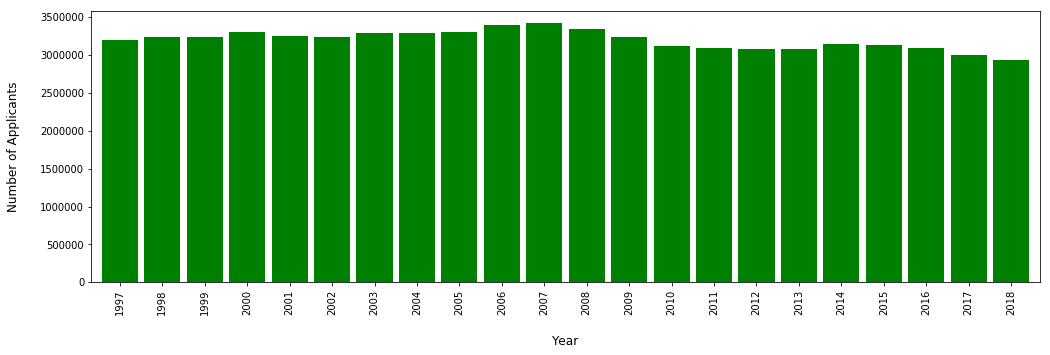

In [13]:
# 绘制柱状图 体现近20年每年的申请SSA人数的变化趋势
# 我的练习
# print('\n Trend in number of yearly applicants in the last 20 years')
# df=data.groupby('year',as_index=False).agg({'count':'sum'}).sort_values('year',ascending=False)
# plt.bar(df,) #卡住了，不会了哭唧唧

#hint 1:近20年，总共108年，从1910到2017，建立新的数据库
# matplotlib 有最基本的plot函数，默认为折线，可通过kind=''改为柱状图，饼图，散点图之类
df=data[data['year']>1996].groupby('year',as_index=False).agg({'count':'sum'})
ax=df.plot('year','count',kind='bar',figsize=(17,5),color='green',zorder=2,width=0.85)
ax.set_xlabel('Year',labelpad=20,size=12)
ax.set_ylabel('Number of Applicants',labelpad=20,size=12)
ax.legend_.remove()

# conclusion based on graph: We observe that the total number of applicants each year has fluctuated between 3M to 3.5M in the last 20 years

知识点4: 递归函数
1. 定义：一种计算过程，如果其中每一步都要用到前一步或前几步的结果，称为递归的。用递归过程定义的函数，称为递归函数，例如连加、连乘及阶乘等。凡是递归的函数，都是可计算的，即能行的
2. 例子：

	def tri_recursion(k):
	  if(k>0):
	    result = k+tri_recursion(k-1)
	    print(result)
	  else:
	    result = 0
	  return result
	
	print("\n\nRecursion Example Results")
	tri_recursion(6)
3. 显示结果：


Recursion Example Results
1
3
6
10
15
21

4. 实现的操作，是1累加到n的计算

知识点5: SQL outer join 和pd.merge 
1. SQL outer join 包括left outer join，right outer join和full outer join，另外多学一个inner join
2. 
SQL Join的关系图看网站：https://dotblogs.com.tw/brooke/2015/03/15/150726

In [16]:
# 定义一个函数 画出特定名字的每一年的数量变化
# Hint 用到def函数

def yearly_trend_plot(character_name):
    #先选取matched的name列（1列df），再按照year分组（变成2列df），再加上count列（变成3列df，包括name，year和count）
    data_agg= data[data['name'] == character_name].groupby(['year'],as_index=False).agg({'count':'sum'})
    if len(data_agg)==0:
        print('No data available')
    else:
        #set up an empty dataframe
        year_df=pd.DataFrame()
        # prepare row data (unique years)
        year_df['year']=data['year'].unique()
        data_agg['key']=1
        # pd.DataFrame.merge series or datagframe
        # year_df 只有一列year，data_agg有三列name，year和count，现在需要合并，按共有列year，用data_agg来配比year，data_agg的其他部分按照是否有对应的year来决定是否加进去
        data_agg=pd.merge(year_df,data_agg,on=['year'],how='left')
        #组合好新的dataframe后，按照时间升序排列
        data_agg=data_agg.sort_values('year',ascending=True)
        #figsize (width,height) 's value by default is 6.4,4.8
        # plot的绘图顺序是：点(1)，线(2)，文字(3),默认为zorder=1, 线会覆盖部分点；若zorder为2，会先画线后点，导致点在线上
        ax=data_agg.plot('year','count',kind='bar',figsize=(17,5),color='green',zorder=2,width=0.85)
        #change looks of ticks, tick labels and gridlines;bottom, top,left, right后加bool判断是否绘制ticks，labelledft后加bool决定是否绘制tick label
        ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
        #set x-axis label
        ax.set_xlabel("Year", labelpad=20, size=12)
        #set y-axis label
        ax.set_ylabel("# of Applicants", labelpad=20, size=12)
        #set title
        ax.set_title("Popularity of the name "+str(character_name)+" in the past 20 years")
        ax.legend_.remove() #plot默认带有legend指示图
        
    
    
    
    
total_unqiue_names=data['name'].unique()


before starting our data visualization and analysis, below is some information

For reference, below is the year that each season was released:
Season 1: 2011 <br/>
Season 2: 2012 <br/>
Season 3: 2013 <br/>
Season 4: 2014 <br/>
Season 5: 2015 <br/>
Season 6: 2016 <br/>
Season 7: 2017 <br/>

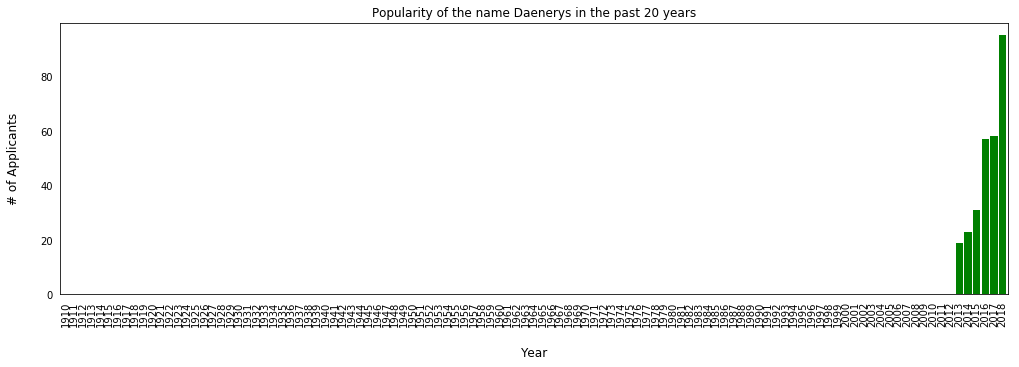

In [17]:
yearly_trend_plot('Daenerys')

# Observation：
# We observe above that about 20 childen were named Daenerys in 2013
# The name has never appeared in the data base before, clearly indicating that the parents were inspired by the Game of Thrones character, who emerges as a clear protagonist on the show in season 3, released in 2013.
# It is also interesting to observe that about 60 children were named Daenerys in 2016 and 2017

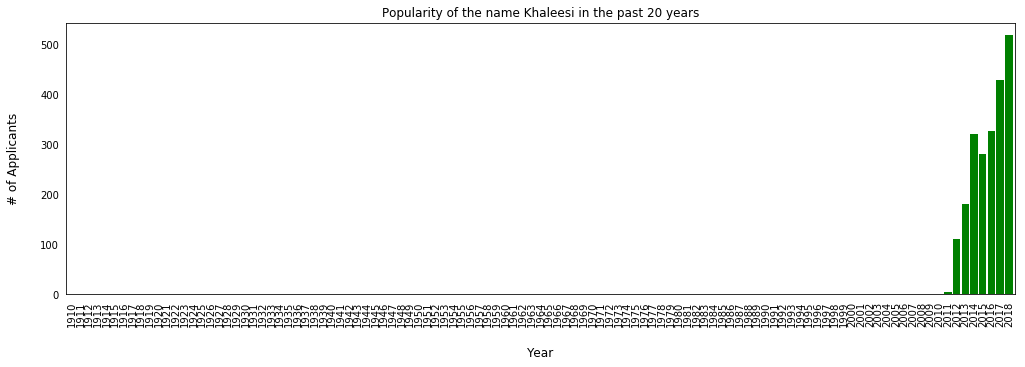

In [18]:
yearly_trend_plot('Khaleesi')

# Insight:
# Again, it is very clear from the above that the name "Khaleesi" has been inspired by Game of Thrones, growing in popularity with the popularity of the show from 2011 to 2017, when a whopping ~400 children were named Khaleesi

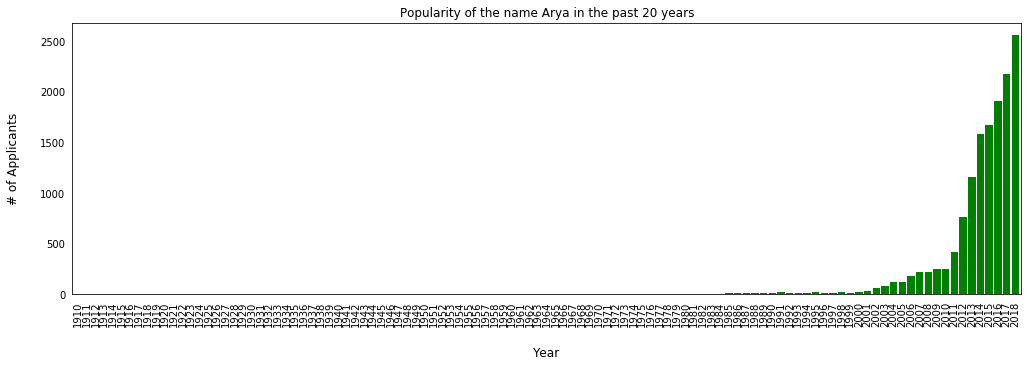

In [20]:
yearly_trend_plot('Arya')

#insight: Observe above how the popularity of the name Arya shoots up between 2011 to 2017, during which the character on the show transforms from a water dancer to a faceless woman


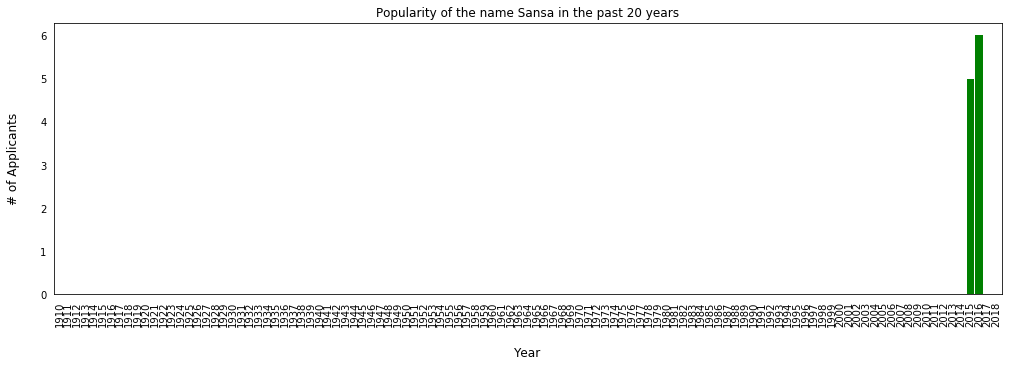

In [21]:
yearly_trend_plot('Sansa')

Next Steps: 
It would be interesting to analyize the impact of other popular culture phenomenon such as Harry Potter on the popularity of names
The Game of Thrones characters above were chosen from my memory, and I may have missed important characters that show a trend. To avoid this, instead of manually looking for character names, we could use the Game of Thrones data set available on Kaggle, to search for the character names in this dataset